#  Analyzing Student Feedback Using Artificial Intelligence techniques in Python

Author:Revathy Remesh




Task for:Python developer position(American University in the Emirates)


In [1]:
#import the required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [2]:
# Load the dataset
df = pd.read_excel('AI_Engineer_Dataset_Task_1.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180969 entries, 0 to 180968
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   AcademicYear         180969 non-null  int64 
 1   SemesterName         180969 non-null  object
 2   ParticipantID        180969 non-null  int64 
 3   DegreeLevel          180969 non-null  object
 4   Gender               180969 non-null  object
 5   Nationality          180969 non-null  object
 6   StudentProgram       180969 non-null  object
 7   CourseCode           180969 non-null  object
 8   CourseName           180969 non-null  object
 9   QuestionText         180969 non-null  object
 10  QuestionType         180969 non-null  object
 11  ParticipantResponse  168848 non-null  object
dtypes: int64(2), object(10)
memory usage: 16.6+ MB


In [4]:
df.head()

,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse
0,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Evaluate financial and managerial accoun...,Rating,Disagree
1,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The coursework and assignments are challenging,Rating,Strongly Disagree
2,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The course is relevant to my program of study,Rating,Strongly Disagree
3,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,Course learning materials are available on the...,Rating,Strongly Disagree
4,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The faculty uses additional resources (other t...,Rating,Strongly Disagree


In [5]:
# Drop rows with missing participant responses
df.dropna(subset=['ParticipantResponse'], inplace=True)


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Revathy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Text Preprocessing
import re
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    return ' '.join(tokens)

df['ProcessedResponse'] = df['ParticipantResponse'].apply(preprocess_text)

In [8]:
df.head()

,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse,ProcessedResponse
0,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Evaluate financial and managerial accoun...,Rating,Disagree,disagree
1,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The coursework and assignments are challenging,Rating,Strongly Disagree,strongly disagree
2,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The course is relevant to my program of study,Rating,Strongly Disagree,strongly disagree
3,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,Course learning materials are available on the...,Rating,Strongly Disagree,strongly disagree
4,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The faculty uses additional resources (other t...,Rating,Strongly Disagree,strongly disagree


In [9]:
# Sentiment Analysis

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['ProcessedResponse'].apply(get_sentiment)

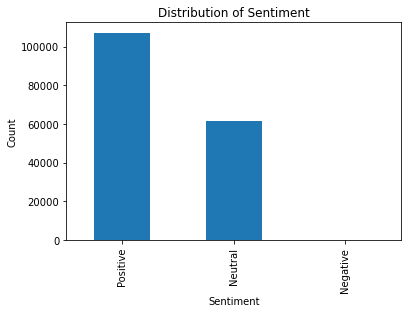

In [10]:
# Visualization of Sentiment Distribution

import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

In [11]:
# Topic Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
# Vectorize the preprocessed text

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['ProcessedResponse'])

# Get feature names
feature_names = vectorizer.get_feature_names()

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)



LatentDirichletAllocation(n_components=5, random_state=42)

In [13]:
# Display topics and representative keywords

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append({
            "Topic": topic_idx + 1,
            "Keywords": [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        })
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics

no_top_words = 10
topics = display_topics(lda, feature_names, no_top_words)

Topic 1:
disagree لا شكرا يوجد perfect practical توجد لدي ليس nope
Topic 2:
strongly disagree na comments نو الاجابه النموذجيه الحصول ورقه للقاضيا
Topic 3:
agree strongly thankz nth number far going right showing dont
Topic 4:
course في من dr على great best thank students المادة
Topic 5:
neutral good ok المستحيل المناسبة لتسهيل 00 وتعمل la nol


In [14]:
# Interpret Sentiment Analysis Results
sentiment_counts = df['Sentiment'].value_counts()
sentiment_distribution = sentiment_counts / sentiment_counts.sum()
print("Sentiment Distribution:")
print(sentiment_distribution)

# Interpret Topic Modeling Results
print("Topics and Keywords:")
for topic in topics:
    print(f"Topic {topic['Topic']}:")
    print("Keywords:", topic['Keywords'])

Sentiment Distribution:
Positive    0.634387
Neutral     0.364979
Negative    0.000634
Name: Sentiment, dtype: float64
Topics and Keywords:
Topic 1:
Keywords: ['disagree', 'لا', 'شكرا', 'يوجد', 'perfect', 'practical', 'توجد', 'لدي', 'ليس', 'nope']
Topic 2:
Keywords: ['strongly', 'disagree', 'na', 'comments', 'نو', 'الاجابه', 'النموذجيه', 'الحصول', 'ورقه', 'للقاضيا']
Topic 3:
Keywords: ['agree', 'strongly', 'thankz', 'nth', 'number', 'far', 'going', 'right', 'showing', 'dont']
Topic 4:
Keywords: ['course', 'في', 'من', 'dr', 'على', 'great', 'best', 'thank', 'students', 'المادة']
Topic 5:
Keywords: ['neutral', 'good', 'ok', 'المستحيل', 'المناسبة', 'لتسهيل', '00', 'وتعمل', 'la', 'nol']
